# Future Climate Changes - 02

In this excercise we will use the simple twobox model investigate how climate on Earth will change in the future given different emissions scenarios. The scenarios are taken from the IPCC report and give different pathways to the year 2100. These are the same as are applied in more complex GCMs.


### Change to the correct directory

First make sure you are in the correct directory 

e.g. cd ~/Documents/GitHub/twobox

In [10]:
cd ~/Documents/GitHub/twobox/

/Users/kerim/Documents/GitHub/twobox


## Shared Socioeconomic Pathways (SSPs)

Shared Socioeconomic Pathways (SSPs) are scenarios of projected socioeconomic changes up to 2100. They are used to derive greenhouse gas emissions scenarios with different climate policies.

These include different scnearios for population growth, economic growth, education, urbanisation and technological development.

<figure>
<img src="images/ssp_scenarier.png" style="width:50%" bla >
<figcaption align = "center"> Source: IPCC </figcaption>
</figure>

The Shared Socioeconomic Pathways (SSPs) describe 5 different futures:

*    SSP1: Sustainability
*    SSP2: Middle of the Road
*    SSP3: Regional Rivalry
*    SSP4: Inequality
*    SSP5: Fossil-fueled Development

Here we choose to focus on the two extremes: Sustainability (SSP1) and Fossil-fueled Development (SSP5)

In [2]:
# Import the required Python packages
import pandas as pd
import matplotlib.pyplot as plt

# Include this line if you want to open this file in Jupyter Notebook to make interactive plots
%matplotlib inline

# Imports the function calculating the temperature changes 
from twobox import calculate_temp_anomalies

### Load the radiative forcing data

The scenarios for future radiative forcing are given in the file `futureForcing.csv` and cover the period 1750 to 2500. As in 01 (historical) the radiative forcing is a combination og the impact of greenhouse gases, solar radiation, etc. However, note that volcanic activity is not included as it is not possible to project into the future.

In [3]:
df=pd.read_csv('forcing_files/futureForcing_IPCC6.csv',index_col = 0,sep=';',encoding = "utf-8")

print('Radiative forcing in W/m2 \n \n', df)

Radiative forcing in W/m2 
 
       SSP1-1.9  SSP1-2.6  SSP2-4.5  SSP3-3.4  SSP3-7.0  SSP4-3.4  SSP4-6.0  \
year                                                                         
1750     0.298     0.298     0.298     0.298     0.298     0.298     0.298   
1751     0.286     0.286     0.286     0.286     0.286     0.286     0.286   
1752     0.261     0.261     0.261     0.261     0.261     0.261     0.261   
1753     0.224     0.224     0.224     0.224     0.224     0.224     0.224   
1754     0.184     0.184     0.184     0.184     0.184     0.184     0.184   
...        ...       ...       ...       ...       ...       ...       ...   
2496     1.379     2.108     4.477       NaN    10.692     2.778     6.404   
2497     1.378     2.107     4.475       NaN    10.689     2.777     6.402   
2498     1.378     2.106     4.473       NaN    10.687     2.777     6.400   
2499     1.377     2.106     4.471       NaN    10.684     2.776     6.398   
2500     1.377     2.105     4.470

### Plot the radiative forcing

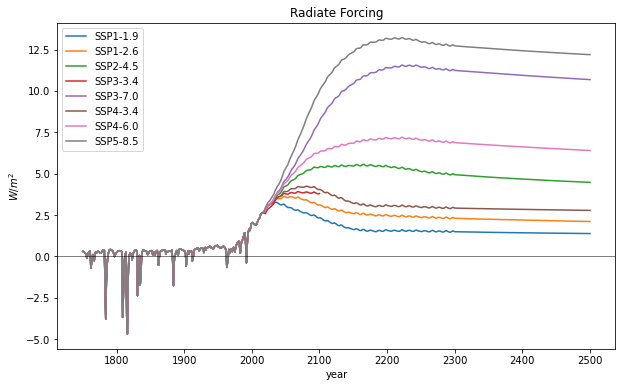

In [4]:
# This plots all the individual radiative forcings stored in the array df

df.plot(title="Radiate Forcing",ylabel="$W/m^2$", figsize=(10,6))
plt.axhline(y=0, linewidth=0.7, color="black", alpha=0.7)

## Apply the values for climate feedbacks ($\lambda$) and ocean heat uptake ($\gamma$)

See description in excercise 01 (historical)

In [5]:
# Set lambda values based on Soden and Held (2006)
lambda_planck = -3.21    # Stefan Boltzmann's 'feedback' [Wm-2K-1] best guesses  [-3.3 to -3.1]
lambda_lapse  = -0.84    # Lapse rate feedback [Wm-2K-1] best guesses [-1.2 to -0.5]
lambda_water  = 1.8      # water vapor feedback [Wm-2K-1] best guesses [1.5 to 2.2]
lambda_cloud  = 0.69     # Clouds feedback [Wm-2K-1] best guesses [0.1 to 1.2]
lambda_albedo = 0.26     # Surface albedo feedback [Wm-2K-1] best guesses [0.1 to 0.4]
lambda_other  = 0.0      # Other feedbacks [Wm-2K-1]

lambda_sum=sum([lambda_planck,
    lambda_lapse,
    lambda_water,
    lambda_cloud,
    lambda_albedo,
    lambda_other])

# Ocean heat uptake [Wm-2K-1]                                                                                                                                                                           #//
gamma=-0.69  

### Run the twobox model for SSP1 and SSP5

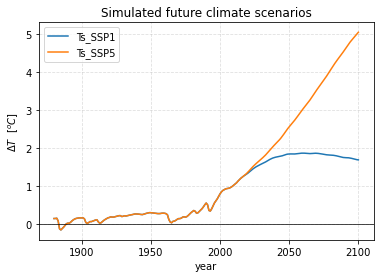

In [6]:
# Make an empty array with the same size as df
temp = pd.DataFrame(index=df.index)

# Calculate the temperature changes based on the radiative forcing scenarios
temp['Ts_SSP1'], To = calculate_temp_anomalies(df['SSP1-2.6'].to_numpy(), lambda_sum, gamma)      # SSP1         
temp['Ts_SSP5'], To = calculate_temp_anomalies(df['SSP5-8.5'].to_numpy(), lambda_sum, gamma)      # SSP5         

# Plot the temperature changes for a given period (e.g. 1880 to 2100)
temp.loc[1880:2100].plot(ylabel="$\Delta T$  $[^oC]$")
plt.title('Simulated future climate scenarios')
plt.axhline(y=0, linewidth=0.7, color="black")                                                                      
plt.grid(alpha=0.4, ls='--')  
plt.show()

### Change the reference value

When we talk about the 1.5C or 2.0C global warming targets it is important to specify what reference period this relates to. Based on the Paris Agreement this refers to the change in temperature relative to the global annual mean temperature for the period 1986 to 2005. 

In the above plot the reference period is the year 1750. To compare the results of the twobox model with those used in the IPCC report we need to adjust our anomaly plots to the given reference period.

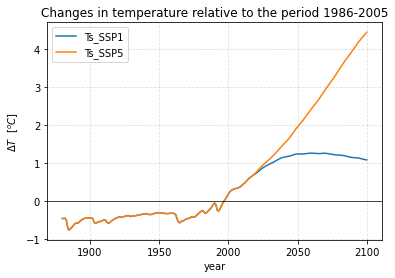

In [7]:
# Make an empty array with the same size as df
Tanom = pd.DataFrame(index=df.index)

# Calculate the temperature anomaly relative to the mean over the period 1986 to 2005
Tanom['Ts_SSP1'] =  temp['Ts_SSP1']- temp['Ts_SSP1'].loc[1986:2005].mean()
Tanom['Ts_SSP5'] =  temp['Ts_SSP5']- temp['Ts_SSP5'].loc[1986:2005].mean()

# Plot the change in temperature relative to the new reference period
Tanom.loc[1880:2100].plot(ylabel="$\Delta T$  $[^oC]$", 
                          title='Changes in temperature relative to the period 1986-2005')
plt.axhline(y=0, linewidth=0.7, color="black")                                                                      
plt.grid(alpha=0.4, ls='--')  
plt.show()          


### Find the temperature for a given year

In [8]:
year = 2090
Tloc = Tanom['Ts_SSP1'].loc[year]
print('Temperature change at the year', year, 'is', "%.2f" %(Tloc),'°C')

Temperature change at the year 2090 is 1.14 °C


### Questions

### Part I - Investigate the temperature change into the future

* What is the combined radiative forcing (in W/m2) for the year 2100 in SSP1 and in SSP5?

* Calculate the change in surface temperature relative to the year 2020

* What is the temperature change in the year 2100 (relative to 1986-2005) for SSP1 and SSP5?

* What is the most important factor governing these temperature changes?

### Part II - Compare the climate models

This plot shows the global temperature changes simulated by the IPCC models in AR6:

<img src="images/AR6-temp-change-to-2100.png" style="width:50%" >
<figcaption align = "center"> Source: IPCC AR6 WG1 SPM </figcaption>

* Compare your results from the twobox model with the IPCC models (remember to change the reference period)

From the figure there is a spread in the projections.

* What is the reason for this spread in the model results of the IPCC?
    * Uncertainties in the forcing
    * Uncertainties in the model physics (e.g. clouds)
    * Internal climate variability
    
* Why does the spread increase with time?
    

### Part III - Make your own multi-model ensemble

A model-ensemble describes a collection of models typically performing the same set of experiments, i.e. like the CMIP6 climate models shown in the first figure. Although we only have one model (the twobox model), we can mimic this by choosing different values for the feedback parameters and re-running the two SSP scenarios multiple times.

Use the range of feedback factors given in the following table:
<figure>
<img src="images/table_lambda_values_AR6.png" style="width:100%" >
<figcaption align = "center"> Source: IPCC AR6 </figcaption>
</figure>

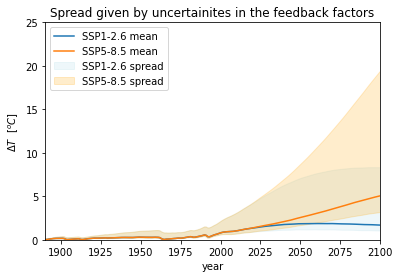

In [11]:
# Choose a range of feedback factors
lambda_planck = (-3.22, -3.4, -3.0, 'high')
lamdba_WV = (1.77, 1.57, 1.97, 'high') # from Zelinka et al., 2020 (one standard deviation)
lamdba_LR = (-0.5, -0.7, -0.3, 'high') # from Dessler, 2013; Caldwell et al., 2016; Colman and Hanson, 2017; Zelinka et al., 2020 (one standard deviation)
lambda_albedo = (0.35, 0.1, 0.6, 'medium')
lambda_cloud = (0.42, -0.1, 0.94, 'high')

lambda_sum_min = lambda_planck[1] + lamdba_WV[1] +lamdba_LR[1] +lambda_albedo[1] + lambda_cloud[1]
lambda_sum_max = lambda_planck[2] + lamdba_WV[2] +lamdba_LR[2] +lambda_albedo[2] + lambda_cloud[2]


# calculate max and min temperature anomalies                                                       
temp['Ts_SSP1_min'], To = calculate_temp_anomalies(df['SSP1-2.6'].to_numpy(), lambda_sum_min, gamma)      # SSP1  
temp['Ts_SSP1_max'], To = calculate_temp_anomalies(df['SSP1-2.6'].to_numpy(), lambda_sum_max, gamma)      # SSP1  

temp['Ts_SSP5_min'], To = calculate_temp_anomalies(df['SSP5-8.5'].to_numpy(), lambda_sum_min, gamma)      # SSP5   
temp['Ts_SSP5_max'], To = calculate_temp_anomalies(df['SSP5-8.5'].to_numpy(), lambda_sum_max, gamma)      # SSP5   

# Plot with spread indicated
temp['Ts_SSP1'].plot(label='SSP1-2.6 mean', ylabel="$\Delta T$  $[^oC]$")
temp['Ts_SSP5'].plot(label='SSP5-8.5 mean')
plt.fill_between(temp.index,temp['Ts_SSP1_min'],temp['Ts_SSP1_max'], color='lightblue',alpha=0.2,label='SSP1-2.6 spread')
plt.fill_between(temp.index,temp['Ts_SSP5_min'],temp['Ts_SSP5_max'], color='orange',alpha=0.2,label='SSP5-8.5 spread')
plt.legend(loc='upper left')
plt.xlim(1890,2100)
plt.ylim(0,25)
plt.title('Spread given by uncertainites in the feedback factors')
plt.show()

## Part IV - What is the impact of ocean heat uptake?

The ocean plays an important role by the uptake of heat from the atmosphere. How does this impact your projections of future climate changes?

Test this by changing the value for gamma ($\gamma$) e.g. try $\gamma = 0$ and rerun your scripts.

* What happens to the surface temperature ($T_s$) once the ocean heat uptake is removed?

* How will the heat uptake by the deep ocean change in the future?
